### Building Ensemble Models using Adaptive Boosting and Gradient Boosting Machines

In [1]:
#load the most commonly used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
rdf = pd.read_excel('Default of CC clients.xls', header=1, index_col="ID")
rdf.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
#Some times reading from excel can be finicky. 
#for files for which the header is not read-in properly, modify as required and run:
#columns = rdf.iloc[0, :]
#col_names = []

 #for j in range (1,24):
  #      col_names.append((columns.iloc[j]))
        
#col_names.insert(0, 'ID')
#col_names
#rdf.columns = [col_names]

In [4]:
#Let's check for missing values
rdf.isnull().values.any()

False

In [5]:
rdf.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [6]:
#Let's check if the datatypes are being recognized as expected
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [7]:
#The name of the last column looks to be long and cumbersome to type. Let's rename it to be more efficient

rdf.rename(columns={'default payment next month': 'default'}, inplace=True)

In [8]:
rdf.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [9]:
rdf.shape

(30000, 24)

In [10]:
#All features are provided in the numberical form, includin categorical features.
#It still needs to be recoded using OHE for eliminating eucleadean distances between them.
#The three cat features are SEX, EDUCATION, and MARRIAGE

feats_list = rdf.columns.values.tolist()

In [11]:
rdf['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [12]:
#Separating the dependent and independent variables 

X = rdf.iloc[:, :-1]
y = rdf.iloc[:, -1:]

In [13]:
X.shape

(30000, 23)

In [14]:
mar_labels = np.unique(X["MARRIAGE"])
sex_labels = np.unique(X["SEX"])
edu_labels = np.unique(X["EDUCATION"])

In [15]:
#initiate functions from the label encoding libraries
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
labelencoder_X = LabelEncoder()
onehotencoder = OneHotEncoder(categorical_features=[0])

In [16]:
mar = pd.DataFrame(labelencoder_X.fit_transform(X["MARRIAGE"]))
sex = pd.DataFrame(labelencoder_X.fit_transform(X["SEX"]))
edu = pd.DataFrame(labelencoder_X.fit_transform(X["EDUCATION"]))

In [ ]:
#Create new temporary dfs for onehotencoding categorical features

mar = pd.DataFrame(onehotencoder.fit_transform(mar).toarray())
mar.columns = mar_labels

sex = pd.DataFrame(onehotencoder.fit_transform(sex).toarray())
sex.columns = sex_labels

edu = pd.DataFrame(onehotencoder.fit_transform(edu).toarray())
edu.columns = edu_labels

In [17]:
X.drop(["SEX", "MARRIAGE", "EDUCATION"], axis=1, inplace=True)

D:\Analytics\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#cat_table1 = pd.DataFrame(pd.concat((mar, sex, edu), axis=1))

In [18]:
#cat_table1.to_csv('cat_table1.csv')
cat_table1 = pd.read_csv('cat_table1.csv')

In [19]:
X = pd.DataFrame(pd.concat((X, cat_table1), axis=1))

In [20]:
X = X.iloc[1: , :]
X.shape

(30000, 33)

In [21]:
X.head().T

,1,2,3,4,5
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0
AGE,24.0,26.0,34.0,37.0,57.0
PAY_0,2.0,-1.0,0.0,0.0,-1.0
PAY_2,2.0,2.0,0.0,0.0,0.0
PAY_3,-1.0,0.0,0.0,0.0,-1.0
PAY_4,-1.0,0.0,0.0,0.0,0.0
PAY_5,-2.0,0.0,0.0,0.0,0.0
PAY_6,-2.0,2.0,0.0,0.0,0.0
BILL_AMT1,3913.0,2682.0,29239.0,46990.0,8617.0
BILL_AMT2,3102.0,1725.0,14027.0,48233.0,5670.0


In [22]:
#split the dataset for training and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [23]:
#Scale the features for more accurate models and to conserve computational resources 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [24]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#X_train.to_csv('X_train.csv')

In [ ]:
#X_train.iloc[8851:8852, :]

In [ ]:
#X_train = pd.read_csv('X_train.csv', index_col="ID")
#X_train.head()

In [25]:
from sklearn.linear_model import LogisticRegression
logitmodel = LogisticRegression(C=0.5)

In [26]:
logitmodel.fit(X_train, y_train)

D:\Analytics\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
y_preds_logit = logitmodel.predict(X_test)

In [28]:
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

D:\Analytics\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
print(classification_report(y_test, y_preds_logit))
cm = confusion_matrix(y_test, y_preds_logit)
print('The Confusion Matrix: \n\n{}'.format(confusion_matrix(y_test, y_preds_logit)))
print('\nThe accuracy is: {}%'. format(accuracy_score(y_test, y_preds_logit)*100))

print('\n Total correct classification {} out of {} values'.format((cm[0,0] + cm[1,1]), (cm.sum())))

             precision    recall  f1-score   support

          0       0.81      0.97      0.89      5784
          1       0.72      0.25      0.37      1716

avg / total       0.79      0.81      0.77      7500

The Confusion Matrix: 

[[5623  161]
 [1293  423]]

The accuracy is: 80.61333333333334%

 Total correct classification 6046 out of 7500 values


#### 1.1 Let's perform cross-validation on Logistic Regression

In [30]:
#Let's reshape the y_train dataset for performing cross-validation with sklearn
y_train = y_train.values
r, c = y_train.shape
y_train = y_train.reshape(r, )

In [31]:
logit_perf = cross_val_score(logitmodel, X_train, y_train, cv=10, scoring='accuracy')

In [32]:
print('The avg accuracy of Logistic model is {}%'.format(logit_perf.mean()*100))
print('The st dev of Logistic model is {}%'.format(logit_perf.std()*100))

The avg accuracy of Logistic model is 81.18222222222222%
The st dev of Logistic model is 0.5933624628721298%


### 2 Decision Tree Model

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtree_model = DecisionTreeClassifier()

In [35]:
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
y_preds_dtree = dtree_model.predict(X_test)

In [37]:
print(classification_report(y_test, y_preds_dtree))
cm = confusion_matrix(y_test, y_preds_dtree)
print('The Confusion Matrix: \n\n{}'.format(confusion_matrix(y_test, y_preds_dtree)))
print('\nThe accuracy is: {}%'. format(accuracy_score(y_test, y_preds_dtree)*100))

print('\n Total correct classification {} out of {} values'.format((cm[0,0] + cm[1,1]), (cm.sum())))

             precision    recall  f1-score   support

          0       0.82      0.81      0.82      5784
          1       0.39      0.40      0.40      1716

avg / total       0.72      0.72      0.72      7500

The Confusion Matrix: 

[[4705 1079]
 [1026  690]]

The accuracy is: 71.93333333333334%

 Total correct classification 5395 out of 7500 values


##### 2.1 Let's perform CV on Decision Tree

In [38]:
dt_perf = cross_val_score(dtree_model, X_train, y_train, cv=10, scoring='accuracy')

In [39]:
print('The avg accuracy of Decision Tree model is {}%'.format(dt_perf.mean()*100))
print('The st dev of Decision Tree model is {}%'.format(dt_perf.std()*100))

The avg accuracy of Decision Tree model is 72.54222222222222%
The st dev of Decision Tree model is 0.8711111111111111%


### 3 Random Forest Model

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rforest_model = RandomForestClassifier()

In [42]:
rforest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
y_preds_rforest = rforest_model.predict(X_test)

In [44]:
print(classification_report(y_test, y_preds_rforest))
cm = confusion_matrix(y_test, y_preds_rforest)
print('The Confusion Matrix: \n\n{}'.format(confusion_matrix(y_test, y_preds_rforest)))
print('\nThe accuracy is: {}%'. format(accuracy_score(y_test, y_preds_rforest)*100))

print('\n Total correct classification {} out of {} values'.format((cm[0,0] + cm[1,1]), (cm.sum())))

             precision    recall  f1-score   support

          0       0.83      0.94      0.88      5784
          1       0.62      0.33      0.43      1716

avg / total       0.78      0.80      0.78      7500

The Confusion Matrix: 

[[5441  343]
 [1152  564]]

The accuracy is: 80.06666666666666%

 Total correct classification 6005 out of 7500 values


In [45]:
rforest_perf = cross_val_score(rforest_model, X_train, y_train, cv=10, scoring='accuracy')

In [46]:
print('The avg accuracy of Random Forest model is {}%'.format(rforest_perf.mean()*100))
print('The st dev of Random Forest model is {}%'.format(rforest_perf.std()*100))

The avg accuracy of Random Forest model is 80.49777777777777%
The st dev of Random Forest model is 0.5915620669146596%


#### 3.1 Performing GridSearch CV on Random Forest

In [47]:
#For the random forest model, it is better to perform a GridSearch operation with Sklearn 
#to best estimate the hyperparameters 

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
#Let's create the parameter grid for the RForest model. it will be a data dictionary for diff hyper parameters.

params_grid_rf = {"bootstrap": [True, False],
               "min_samples_split": [2, 3, 10],
               "min_samples_leaf": [1, 3, 10],
               "max_depth": [3, None],
               "criterion":['gini', 'entropy']}

In [50]:
grid_search_rf = GridSearchCV(rforest_model, param_grid=params_grid_rf, cv=5, verbose=3, scoring='accuracy')

In [51]:
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] max_depth=3, min_samples_split=2, min_samples_leaf=1, criterion=gini, bootstrap=True 
[CV]  max_depth=3, min_samples_split=2, min_samples_leaf=1, criterion=gini, bootstrap=True, score=0.8077777777777778, total=   0.0s
[CV] max_depth=3, min_samples_split=2, min_samples_leaf=1, criterion=gini, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=3, min_samples_split=2, min_samples_leaf=1, criterion=gini, bootstrap=True, score=0.8077777777777778, total=   0.1s
[CV] max_depth=3, min_samples_split=2, min_samples_leaf=1, criterion=gini, bootstrap=True 
[CV]  max_depth=3, min_samples_split=2, min_samples_leaf=1, criterion=gini, bootstrap=True, score=0.7993333333333333, total=   0.1s
[CV] max_depth=3, min_samples_split=2, min_samples_leaf=1, criterion=gini, bootstrap=True 
[CV]  max_depth=3, min_samples_split=2, min_samples_leaf=1, criterion=gini, bootstrap=True, score=0.8046666666666666, total=   0.1s
[CV] max_depth=3, min_samples_split=2, min_samples_leaf=1, criterion=gini, bootstrap=True 
[CV]  max_depth=3, min_samples_split=2, min_samples_leaf=1, criterion=gini, bootstrap=True, score=0.8031111111111111, total=   0.0s
[CV] max_depth=3, min_samples_split=3, min_samples_leaf=1, criterion=gini, bootstrap=True 
[CV]  max_depth=3, min_samples_split=3, min_samples_leaf=1, criterion=gini, bootstrap=True, score=0.81022222

[CV]  max_depth=3, min_samples_split=3, min_samples_leaf=10, criterion=gini, bootstrap=True, score=0.806, total=   0.0s
[CV] max_depth=3, min_samples_split=10, min_samples_leaf=10, criterion=gini, bootstrap=True 
[CV]  max_depth=3, min_samples_split=10, min_samples_leaf=10, criterion=gini, bootstrap=True, score=0.8084444444444444, total=   0.0s
[CV] max_depth=3, min_samples_split=10, min_samples_leaf=10, criterion=gini, bootstrap=True 
[CV]  max_depth=3, min_samples_split=10, min_samples_leaf=10, criterion=gini, bootstrap=True, score=0.8135555555555556, total=   0.1s
[CV] max_depth=3, min_samples_split=10, min_samples_leaf=10, criterion=gini, bootstrap=True 
[CV]  max_depth=3, min_samples_split=10, min_samples_leaf=10, criterion=gini, bootstrap=True, score=0.7986666666666666, total=   0.1s
[CV] max_depth=3, min_samples_split=10, min_samples_leaf=10, criterion=gini, bootstrap=True 
[CV]  max_depth=3, min_samples_split=10, min_samples_leaf=10, criterion=gini, bootstrap=True, score=0.8071

[CV]  max_depth=None, min_samples_split=2, min_samples_leaf=10, criterion=gini, bootstrap=True, score=0.8231111111111111, total=   0.3s
[CV] max_depth=None, min_samples_split=2, min_samples_leaf=10, criterion=gini, bootstrap=True 
[CV]  max_depth=None, min_samples_split=2, min_samples_leaf=10, criterion=gini, bootstrap=True, score=0.8111111111111111, total=   0.3s
[CV] max_depth=None, min_samples_split=2, min_samples_leaf=10, criterion=gini, bootstrap=True 
[CV]  max_depth=None, min_samples_split=2, min_samples_leaf=10, criterion=gini, bootstrap=True, score=0.8111111111111111, total=   0.3s
[CV] max_depth=None, min_samples_split=2, min_samples_leaf=10, criterion=gini, bootstrap=True 
[CV]  max_depth=None, min_samples_split=2, min_samples_leaf=10, criterion=gini, bootstrap=True, score=0.826, total=   0.3s
[CV] max_depth=None, min_samples_split=3, min_samples_leaf=10, criterion=gini, bootstrap=True 
[CV]  max_depth=None, min_samples_split=3, min_samples_leaf=10, criterion=gini, bootstrap

[CV]  max_depth=3, min_samples_split=3, min_samples_leaf=3, criterion=entropy, bootstrap=True, score=0.7986666666666666, total=   0.1s
[CV] max_depth=3, min_samples_split=3, min_samples_leaf=3, criterion=entropy, bootstrap=True 
[CV]  max_depth=3, min_samples_split=3, min_samples_leaf=3, criterion=entropy, bootstrap=True, score=0.8082222222222222, total=   0.1s
[CV] max_depth=3, min_samples_split=3, min_samples_leaf=3, criterion=entropy, bootstrap=True 
[CV]  max_depth=3, min_samples_split=3, min_samples_leaf=3, criterion=entropy, bootstrap=True, score=0.8082222222222222, total=   0.1s
[CV] max_depth=3, min_samples_split=10, min_samples_leaf=3, criterion=entropy, bootstrap=True 
[CV]  max_depth=3, min_samples_split=10, min_samples_leaf=3, criterion=entropy, bootstrap=True, score=0.8077777777777778, total=   0.1s
[CV] max_depth=3, min_samples_split=10, min_samples_leaf=3, criterion=entropy, bootstrap=True 
[CV]  max_depth=3, min_samples_split=10, min_samples_leaf=3, criterion=entropy, b

[CV]  max_depth=None, min_samples_split=10, min_samples_leaf=1, criterion=entropy, bootstrap=True, score=0.8068888888888889, total=   0.6s
[CV] max_depth=None, min_samples_split=10, min_samples_leaf=1, criterion=entropy, bootstrap=True 
[CV]  max_depth=None, min_samples_split=10, min_samples_leaf=1, criterion=entropy, bootstrap=True, score=0.8106666666666666, total=   0.7s
[CV] max_depth=None, min_samples_split=2, min_samples_leaf=3, criterion=entropy, bootstrap=True 
[CV]  max_depth=None, min_samples_split=2, min_samples_leaf=3, criterion=entropy, bootstrap=True, score=0.8102222222222222, total=   0.6s
[CV] max_depth=None, min_samples_split=2, min_samples_leaf=3, criterion=entropy, bootstrap=True 
[CV]  max_depth=None, min_samples_split=2, min_samples_leaf=3, criterion=entropy, bootstrap=True, score=0.8153333333333334, total=   0.6s
[CV] max_depth=None, min_samples_split=2, min_samples_leaf=3, criterion=entropy, bootstrap=True 
[CV]  max_depth=None, min_samples_split=2, min_samples_le

[CV]  max_depth=3, min_samples_split=2, min_samples_leaf=1, criterion=gini, bootstrap=False, score=0.8095555555555556, total=   0.1s
[CV] max_depth=3, min_samples_split=3, min_samples_leaf=1, criterion=gini, bootstrap=False 
[CV]  max_depth=3, min_samples_split=3, min_samples_leaf=1, criterion=gini, bootstrap=False, score=0.8053333333333333, total=   0.1s
[CV] max_depth=3, min_samples_split=3, min_samples_leaf=1, criterion=gini, bootstrap=False 
[CV]  max_depth=3, min_samples_split=3, min_samples_leaf=1, criterion=gini, bootstrap=False, score=0.814, total=   0.1s
[CV] max_depth=3, min_samples_split=3, min_samples_leaf=1, criterion=gini, bootstrap=False 
[CV]  max_depth=3, min_samples_split=3, min_samples_leaf=1, criterion=gini, bootstrap=False, score=0.8075555555555556, total=   0.1s
[CV] max_depth=3, min_samples_split=3, min_samples_leaf=1, criterion=gini, bootstrap=False 
[CV]  max_depth=3, min_samples_split=3, min_samples_leaf=1, criterion=gini, bootstrap=False, score=0.81, total=  

[CV]  max_depth=3, min_samples_split=10, min_samples_leaf=10, criterion=gini, bootstrap=False, score=0.8115555555555556, total=   0.1s
[CV] max_depth=3, min_samples_split=10, min_samples_leaf=10, criterion=gini, bootstrap=False 
[CV]  max_depth=3, min_samples_split=10, min_samples_leaf=10, criterion=gini, bootstrap=False, score=0.8013333333333333, total=   0.1s
[CV] max_depth=3, min_samples_split=10, min_samples_leaf=10, criterion=gini, bootstrap=False 
[CV]  max_depth=3, min_samples_split=10, min_samples_leaf=10, criterion=gini, bootstrap=False, score=0.8022222222222222, total=   0.1s
[CV] max_depth=3, min_samples_split=10, min_samples_leaf=10, criterion=gini, bootstrap=False 
[CV]  max_depth=3, min_samples_split=10, min_samples_leaf=10, criterion=gini, bootstrap=False, score=0.8113333333333334, total=   0.1s
[CV] max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion=gini, bootstrap=False 
[CV]  max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion=gini, boot

[CV]  max_depth=None, min_samples_split=2, min_samples_leaf=10, criterion=gini, bootstrap=False, score=0.814, total=   0.6s
[CV] max_depth=None, min_samples_split=2, min_samples_leaf=10, criterion=gini, bootstrap=False 
[CV]  max_depth=None, min_samples_split=2, min_samples_leaf=10, criterion=gini, bootstrap=False, score=0.8142222222222222, total=   0.6s
[CV] max_depth=None, min_samples_split=2, min_samples_leaf=10, criterion=gini, bootstrap=False 
[CV]  max_depth=None, min_samples_split=2, min_samples_leaf=10, criterion=gini, bootstrap=False, score=0.816, total=   0.6s
[CV] max_depth=None, min_samples_split=3, min_samples_leaf=10, criterion=gini, bootstrap=False 
[CV]  max_depth=None, min_samples_split=3, min_samples_leaf=10, criterion=gini, bootstrap=False, score=0.8175555555555556, total=   0.6s
[CV] max_depth=None, min_samples_split=3, min_samples_leaf=10, criterion=gini, bootstrap=False 
[CV]  max_depth=None, min_samples_split=3, min_samples_leaf=10, criterion=gini, bootstrap=Fals

[CV]  max_depth=3, min_samples_split=3, min_samples_leaf=3, criterion=entropy, bootstrap=False, score=0.8035555555555556, total=   0.2s
[CV] max_depth=3, min_samples_split=3, min_samples_leaf=3, criterion=entropy, bootstrap=False 
[CV]  max_depth=3, min_samples_split=3, min_samples_leaf=3, criterion=entropy, bootstrap=False, score=0.8017777777777778, total=   0.1s
[CV] max_depth=3, min_samples_split=10, min_samples_leaf=3, criterion=entropy, bootstrap=False 
[CV]  max_depth=3, min_samples_split=10, min_samples_leaf=3, criterion=entropy, bootstrap=False, score=0.8022222222222222, total=   0.2s
[CV] max_depth=3, min_samples_split=10, min_samples_leaf=3, criterion=entropy, bootstrap=False 
[CV]  max_depth=3, min_samples_split=10, min_samples_leaf=3, criterion=entropy, bootstrap=False, score=0.8088888888888889, total=   0.2s
[CV] max_depth=3, min_samples_split=10, min_samples_leaf=3, criterion=entropy, bootstrap=False 
[CV]  max_depth=3, min_samples_split=10, min_samples_leaf=3, criterion=

[CV]  max_depth=None, min_samples_split=10, min_samples_leaf=1, criterion=entropy, bootstrap=False, score=0.8037777777777778, total=   1.2s
[CV] max_depth=None, min_samples_split=2, min_samples_leaf=3, criterion=entropy, bootstrap=False 
[CV]  max_depth=None, min_samples_split=2, min_samples_leaf=3, criterion=entropy, bootstrap=False, score=0.8104444444444444, total=   1.0s
[CV] max_depth=None, min_samples_split=2, min_samples_leaf=3, criterion=entropy, bootstrap=False 
[CV]  max_depth=None, min_samples_split=2, min_samples_leaf=3, criterion=entropy, bootstrap=False, score=0.8182222222222222, total=   0.9s
[CV] max_depth=None, min_samples_split=2, min_samples_leaf=3, criterion=entropy, bootstrap=False 
[CV]  max_depth=None, min_samples_split=2, min_samples_leaf=3, criterion=entropy, bootstrap=False, score=0.8091111111111111, total=   1.0s
[CV] max_depth=None, min_samples_split=2, min_samples_leaf=3, criterion=entropy, bootstrap=False 
[CV]  max_depth=None, min_samples_split=2, min_samp

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  3.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, None], 'min_samples_split': [2, 3, 10], 'min_samples_leaf': [1, 3, 10], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

In [52]:
grid_search_rf.best_score_

0.8187111111111111

In [53]:
grid_search_rf.best_estimator_.get_params()

{'bootstrap': False,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 4 Model Boosting
#### 4.1 Bagging (w/ Logistic Classifier)

In [54]:
from sklearn.ensemble import BaggingClassifier

In [55]:
bag_classifier_logit = BaggingClassifier(base_estimator=logitmodel, n_estimators=200, bootstrap=True, oob_score=True)

In [56]:
bag_classifier_logit.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=200, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [57]:
bag_classifier_logit.oob_score_

0.8112

In [58]:
y_preds_logit_bg = bag_classifier_logit.predict(X_test)

In [59]:
print(classification_report(y_test, y_preds_logit_bg))
cm = confusion_matrix(y_test, y_preds_logit_bg)
print('The Confusion Matrix: \n\n{}'.format(confusion_matrix(y_test, y_preds_logit_bg)))
print('\nThe accuracy is: {}%'. format(accuracy_score(y_test, y_preds_logit_bg)*100))

print('\n Total correct classification {} out of {} values'.format((cm[0,0] + cm[1,1]), (cm.sum())))

             precision    recall  f1-score   support

          0       0.81      0.97      0.89      5784
          1       0.72      0.25      0.37      1716

avg / total       0.79      0.81      0.77      7500

The Confusion Matrix: 

[[5620  164]
 [1294  422]]

The accuracy is: 80.56%

 Total correct classification 6042 out of 7500 values


#### 4.2 Bagging for the Decision Tree 

In [61]:
bag_classifier_dtree = BaggingClassifier(base_estimator=dtree_model, n_estimators=300, bootstrap=True, oob_score=True)

In [62]:
bag_classifier_dtree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [63]:
bag_classifier_dtree.oob_score_

0.8164444444444444

In [64]:
y_preds_dtree_bg = bag_classifier_dtree.predict(X_test)

In [65]:
print(classification_report(y_test, y_preds_dtree_bg))
cm = confusion_matrix(y_test, y_preds_dtree_bg)
print('The Confusion Matrix: \n\n{}'.format(confusion_matrix(y_test, y_preds_dtree_bg)))
print('\nThe accuracy is: {}%'. format(accuracy_score(y_test, y_preds_dtree_bg)*100))

print('\n Total correct classification {} out of {} values'.format((cm[0,0] + cm[1,1]), (cm.sum())))

             precision    recall  f1-score   support

          0       0.84      0.94      0.89      5784
          1       0.66      0.39      0.49      1716

avg / total       0.80      0.81      0.80      7500

The Confusion Matrix: 

[[5438  346]
 [1051  665]]

The accuracy is: 81.37333333333333%

 Total correct classification 6103 out of 7500 values


#### 4.2 AdaBoost Model (Adaptive Boosting) Base

In [66]:
from sklearn.ensemble import AdaBoostClassifier

In [67]:
ada_model = AdaBoostClassifier()

In [68]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [69]:
y_preds_ada = ada_model.predict(X_test)

In [70]:
print(classification_report(y_test, y_preds_ada))
cm = confusion_matrix(y_test, y_preds_ada)
print('The Confusion Matrix: \n\n{}'.format(confusion_matrix(y_test, y_preds_ada)))
print('\nThe accuracy is: {}%'. format(accuracy_score(y_test, y_preds_ada)*100))

print('\n Total correct classification {} out of {} values'.format((cm[0,0] + cm[1,1]), (cm.sum())))

             precision    recall  f1-score   support

          0       0.83      0.96      0.89      5784
          1       0.69      0.33      0.45      1716

avg / total       0.80      0.81      0.79      7500

The Confusion Matrix: 

[[5534  250]
 [1147  569]]

The accuracy is: 81.37333333333333%

 Total correct classification 6103 out of 7500 values


#### 5.1 Ensembling AdaBoost w/ Logit

In [71]:
ada_model_logit = AdaBoostClassifier(base_estimator=logitmodel, n_estimators=50)

In [72]:
ada_model_logit.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [73]:
y_preds_ada_logit = ada_model_logit.predict(X_test)

In [74]:
print(classification_report(y_test, y_preds_ada_logit))
cm = confusion_matrix(y_test, y_preds_ada_logit)
print('The Confusion Matrix: \n\n{}'.format(confusion_matrix(y_test, y_preds_ada_logit)))
print('\nThe accuracy is: {}%'. format(accuracy_score(y_test, y_preds_ada_logit)*100))

print('\n Total correct classification {} out of {} values'.format((cm[0,0] + cm[1,1]), (cm.sum())))

             precision    recall  f1-score   support

          0       0.80      0.98      0.88      5784
          1       0.75      0.17      0.28      1716

avg / total       0.79      0.80      0.74      7500

The Confusion Matrix: 

[[5687   97]
 [1423  293]]

The accuracy is: 79.73333333333333%

 Total correct classification 5980 out of 7500 values


In [75]:
ada_logit_perf = cross_val_score(ada_model_logit, X_train, y_train, cv=10, scoring='accuracy')

In [78]:
ada_logit_perf.mean()

0.8018666666666666

#### 5.2 Ensembling AdaBoost w/ Decision Tree

In [79]:
ada_model_dtree = AdaBoostClassifier(base_estimator=dtree_model, n_estimators=50)

In [80]:
ada_model_dtree.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [81]:
y_preds_ada_dtree = ada_model_dtree.predict(X_test)

In [82]:
print(classification_report(y_test, y_preds_ada_dtree))
cm = confusion_matrix(y_test, y_preds_ada_dtree)
print('The Confusion Matrix: \n\n{}'.format(confusion_matrix(y_test, y_preds_ada_dtree)))
print('\nThe accuracy is: {}%'. format(accuracy_score(y_test, y_preds_ada_dtree)*100))

print('\n Total correct classification {} out of {} values'.format((cm[0,0] + cm[1,1]), (cm.sum())))

             precision    recall  f1-score   support

          0       0.83      0.93      0.87      5784
          1       0.59      0.34      0.43      1716

avg / total       0.77      0.79      0.77      7500

The Confusion Matrix: 

[[5373  411]
 [1134  582]]

The accuracy is: 79.4%

 Total correct classification 5955 out of 7500 values


### 6 Gradient Boosting Modeling (GBM)

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
gbm_model = GradientBoostingClassifier()

In [85]:
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [86]:
y_preds_gbm = gbm_model.predict(X_test)

In [87]:
print(classification_report(y_test, y_preds_gbm))
cm = confusion_matrix(y_test, y_preds_gbm)
print('The Confusion Matrix: \n\n{}'.format(confusion_matrix(y_test, y_preds_gbm)))
print('\nThe accuracy is: {}%'. format(accuracy_score(y_test, y_preds_gbm)*100))

print('\n Total correct classification {} out of {} values'.format((cm[0,0] + cm[1,1]), (cm.sum())))

             precision    recall  f1-score   support

          0       0.84      0.95      0.89      5784
          1       0.70      0.38      0.49      1716

avg / total       0.81      0.82      0.80      7500

The Confusion Matrix: 

[[5495  289]
 [1057  659]]

The accuracy is: 82.05333333333333%

 Total correct classification 6154 out of 7500 values


In [88]:
gbm_perf = cross_val_score(gbm_model,X_train, y_train, scoring='accuracy', cv=10)

In [89]:
gbm_perf.mean()

0.8218222222222222

#### 6.1 Let's tune the GBM by performing GridSearch CV

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
params_grid_gbm = {'n_estimators':range(20,40),
                   'subsample': [0.6, 0.7, 0.8],
                    'learning_rate': [0.1, 0.2]}

In [93]:
grid_search_gbm = GridSearchCV(estimator = GradientBoostingClassifier(min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt'), 
param_grid = params_grid_gbm, scoring='roc_auc',iid=False, cv=2, verbose = 3)

In [94]:
grid_search_gbm.fit(X_train, y_train)

Fitting 2 folds for each of 120 candidates, totalling 240 fits
[CV] n_estimators=20, subsample=0.6, learning_rate=0.1 ...............
[CV]  n_estimators=20, subsample=0.6, learning_rate=0.1, score=0.7845935653042537, total=   0.2s
[CV] n_estimators=20, subsample=0.6, learning_rate=0.1 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=20, subsample=0.6, learning_rate=0.1, score=0.7775157930760196, total=   0.2s
[CV] n_estimators=20, subsample=0.7, learning_rate=0.1 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=20, subsample=0.7, learning_rate=0.1, score=0.7854237538962421, total=   0.2s
[CV] n_estimators=20, subsample=0.7, learning_rate=0.1 ...............
[CV]  n_estimators=20, subsample=0.7, learning_rate=0.1, score=0.7776343220770091, total=   0.3s
[CV] n_estimators=20, subsample=0.8, learning_rate=0.1 ...............
[CV]  n_estimators=20, subsample=0.8, learning_rate=0.1, score=0.7861026711802954, total=   0.3s
[CV] n_estimators=20, subsample=0.8, learning_rate=0.1 ...............
[CV]  n_estimators=20, subsample=0.8, learning_rate=0.1, score=0.7763185715474902, total=   0.2s
[CV] n_estimators=21, subsample=0.6, learning_rate=0.1 ...............
[CV]  n_estimators=21, subsample=0.6, learning_rate=0.1, score=0.7846261688726102, total=   0.2s
[CV] n_estimators=21, subsample=0.6, learning_rate=0.1 ...............
[CV]  n_estimators=21, subsample=0.6, learning_rate=0.1, score=0.7753569743888564, total=   0.2s
[CV] n_estimators=21, subsample=0.7, learning_rate=0.1 ........

[CV]  n_estimators=28, subsample=0.7, learning_rate=0.1, score=0.7788624591877317, total=   0.3s
[CV] n_estimators=28, subsample=0.8, learning_rate=0.1 ...............
[CV]  n_estimators=28, subsample=0.8, learning_rate=0.1, score=0.7867229020413071, total=   0.3s
[CV] n_estimators=28, subsample=0.8, learning_rate=0.1 ...............
[CV]  n_estimators=28, subsample=0.8, learning_rate=0.1, score=0.7773432253947112, total=   0.3s
[CV] n_estimators=29, subsample=0.6, learning_rate=0.1 ...............
[CV]  n_estimators=29, subsample=0.6, learning_rate=0.1, score=0.7871234403470315, total=   0.3s
[CV] n_estimators=29, subsample=0.6, learning_rate=0.1 ...............
[CV]  n_estimators=29, subsample=0.6, learning_rate=0.1, score=0.7770242653791725, total=   0.3s
[CV] n_estimators=29, subsample=0.7, learning_rate=0.1 ...............
[CV]  n_estimators=29, subsample=0.7, learning_rate=0.1, score=0.7862193734565333, total=   0.3s
[CV] n_estimators=29, subsample=0.7, learning_rate=0.1 ........

[CV]  n_estimators=36, subsample=0.8, learning_rate=0.1, score=0.7882729358010303, total=   0.4s
[CV] n_estimators=36, subsample=0.8, learning_rate=0.1 ...............
[CV]  n_estimators=36, subsample=0.8, learning_rate=0.1, score=0.7785801955289178, total=   0.4s
[CV] n_estimators=37, subsample=0.6, learning_rate=0.1 ...............
[CV]  n_estimators=37, subsample=0.6, learning_rate=0.1, score=0.7882697679365872, total=   0.4s
[CV] n_estimators=37, subsample=0.6, learning_rate=0.1 ...............
[CV]  n_estimators=37, subsample=0.6, learning_rate=0.1, score=0.7789084741530009, total=   0.4s
[CV] n_estimators=37, subsample=0.7, learning_rate=0.1 ...............
[CV]  n_estimators=37, subsample=0.7, learning_rate=0.1, score=0.7857897000471712, total=   0.4s
[CV] n_estimators=37, subsample=0.7, learning_rate=0.1 ...............
[CV]  n_estimators=37, subsample=0.7, learning_rate=0.1, score=0.7782846129655836, total=   0.4s
[CV] n_estimators=37, subsample=0.8, learning_rate=0.1 ........

[CV]  n_estimators=24, subsample=0.8, learning_rate=0.2, score=0.7753102194844474, total=   0.2s
[CV] n_estimators=25, subsample=0.6, learning_rate=0.2 ...............
[CV]  n_estimators=25, subsample=0.6, learning_rate=0.2, score=0.7852408964362682, total=   0.2s
[CV] n_estimators=25, subsample=0.6, learning_rate=0.2 ...............
[CV]  n_estimators=25, subsample=0.6, learning_rate=0.2, score=0.7774710730042456, total=   0.2s
[CV] n_estimators=25, subsample=0.7, learning_rate=0.2 ...............
[CV]  n_estimators=25, subsample=0.7, learning_rate=0.2, score=0.7854721042944218, total=   0.3s
[CV] n_estimators=25, subsample=0.7, learning_rate=0.2 ...............
[CV]  n_estimators=25, subsample=0.7, learning_rate=0.2, score=0.771846633739375, total=   0.3s
[CV] n_estimators=25, subsample=0.8, learning_rate=0.2 ...............
[CV]  n_estimators=25, subsample=0.8, learning_rate=0.2, score=0.7851423457920585, total=   0.3s
[CV] n_estimators=25, subsample=0.8, learning_rate=0.2 .........

[CV]  n_estimators=33, subsample=0.6, learning_rate=0.2, score=0.781929391307565, total=   0.3s
[CV] n_estimators=33, subsample=0.6, learning_rate=0.2 ...............
[CV]  n_estimators=33, subsample=0.6, learning_rate=0.2, score=0.7763626210494188, total=   0.3s
[CV] n_estimators=33, subsample=0.7, learning_rate=0.2 ...............
[CV]  n_estimators=33, subsample=0.7, learning_rate=0.2, score=0.7869430339354587, total=   0.3s
[CV] n_estimators=33, subsample=0.7, learning_rate=0.2 ...............
[CV]  n_estimators=33, subsample=0.7, learning_rate=0.2, score=0.7755662384268893, total=   0.3s
[CV] n_estimators=33, subsample=0.8, learning_rate=0.2 ...............
[CV]  n_estimators=33, subsample=0.8, learning_rate=0.2, score=0.7835032418583571, total=   0.3s
[CV] n_estimators=33, subsample=0.8, learning_rate=0.2 ...............
[CV]  n_estimators=33, subsample=0.8, learning_rate=0.2, score=0.7757428064041734, total=   0.3s
[CV] n_estimators=34, subsample=0.6, learning_rate=0.2 .........

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  1.7min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'n_estimators': range(20, 40), 'subsample': [0.6, 0.7, 0.8], 'learning_rate': [0.1, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=3)

In [95]:
grid_search_gbm.best_params_

{'learning_rate': 0.1, 'n_estimators': 39, 'subsample': 0.7}

In [96]:
grid_search_gbm.best_score_

0.7844204426685906

#### Let's Plot the ROC Curves

In [97]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [99]:
#ROC of simple models
logit_roc_auc = roc_auc_score(y_test, logitmodel.predict(X_test))
fpr_log, tpr_log, thresholds = roc_curve(y_test, logitmodel.predict_proba(X_test)[:,1])

dtree_roc_auc = roc_auc_score(y_test, dtree_model.predict(X_test))
fpr_dtree, tpr_dtree, thresholds = roc_curve(y_test, dtree_model.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rforest_model.predict(X_test))
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, rforest_model.predict_proba(X_test)[:,1])

In [101]:
#ROC of Boosted Models

baglog_roc_auc = roc_auc_score(y_test, bag_classifier_logit.predict(X_test))
fpr_baglog, tpr_baglog, thresholds = roc_curve(y_test, bag_classifier_logit.predict_proba(X_test)[:,1])

bagdt_roc_auc = roc_auc_score(y_test, bag_classifier_dtree.predict(X_test))
fpr_bagdt, tpr_bagdt, thresholds = roc_curve(y_test, bag_classifier_dtree.predict_proba(X_test)[:,1])

adamodel_roc_auc = roc_auc_score(y_test, ada_model.predict(X_test))
fpr_ada, tpr_ada, thresholds = roc_curve(y_test, ada_model.predict_proba(X_test)[:,1])

ada_log_roc_auc = roc_auc_score(y_test, ada_model_logit.predict(X_test))
fpr_adalog, tpr_adalog, thresholds = roc_curve(y_test, ada_model_logit.predict_proba(X_test)[:,1])

adadt_roc_auc = roc_auc_score(y_test, ada_model_dtree.predict(X_test))
fpr_adadt, tpr_adadt, thresholds = roc_curve(y_test, ada_model_dtree.predict_proba(X_test)[:,1])

gbm_roc_auc = roc_auc_score(y_test, gbm_model.predict(X_test))
fpr_gbm, tpr_gbm, thresholds = roc_curve(y_test, gbm_model.predict_proba(X_test)[:,1])

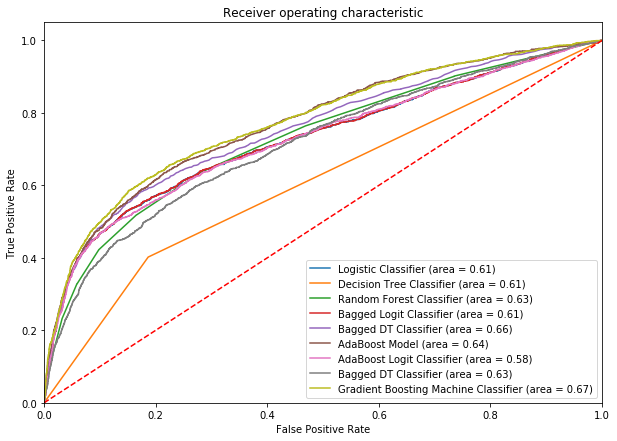

In [106]:
plt.figure(figsize=(10,7))
plt.plot(fpr_log, tpr_log, label='Logistic Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_dtree, tpr_dtree, label='Decision Tree Classifier (area = %0.2f)' % dtree_roc_auc)
plt.plot(fpr_rf, tpr_rf, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
plt.plot(fpr_baglog, tpr_baglog, label='Bagged Logit Classifier (area = %0.2f)' % baglog_roc_auc)
plt.plot(fpr_bagdt, tpr_bagdt, label='Bagged DT Classifier (area = %0.2f)' % bagdt_roc_auc)
plt.plot(fpr_ada, tpr_ada, label='AdaBoost Model (area = %0.2f)' % adamodel_roc_auc)
plt.plot(fpr_adalog, tpr_adalog, label='AdaBoost Logit Classifier (area = %0.2f)' % ada_log_roc_auc)
plt.plot(fpr_adadt, tpr_adadt, label='Bagged DT Classifier (area = %0.2f)' % adadt_roc_auc)
plt.plot(fpr_gbm, tpr_gbm, label='Gradient Boosting Machine Classifier (area = %0.2f)' % gbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

Remarks:

* Ensemble models typically tend to have high accuracy on training dataset (unless the data is very noisy). The results and operational aspect from ensembles are difficult to interpret intuitively, but tree methods like RF do classify remarkably well on many diverse datasets. 


* In this case, none of the 9 the models have a high accuracy rate as per the ROC AUC. What are the reasons for this and how do we improve model performance? 

1> We did not perform feature scaling which affects model accuracy since most of them work on euclidean distances. 

2> The model performs better when it's trained on proportionally split train/test datasets. 

3> I'll leave you to guess additional tweaks we can make to improve model performance. (Hint: let's go back to basics and think simpler models.) 

Let us do these and more in a new post. 
